<a href="https://colab.research.google.com/github/farhan1503001/Time-Series-Analysis-and-Natural-Language-Processing/blob/main/Combination_of_Neural_Network_and_Bidirectional_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.0.0b1

     |████████████████████████████████| 87.9MB 50kB/s 
     |████████████████████████████████| 501kB 51.0MB/s 
     |████████████████████████████████| 3.1MB 50.0MB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [ ]:
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

2.0.0-beta1


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [ ]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv \
    -O /tmp/daily-min-temperatures.csv

--2020-01-16 05:49:08--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/plain]
Saving to: ‘/tmp/daily-min-temperatures.csv’

/tmp/daily-min-temp 100%[===================>]  66.33K  --.-KB/s    in 0.008s  

2020-01-16 05:49:08 (8.39 MB/s) - ‘/tmp/daily-min-temperatures.csv’ saved [67921/67921]



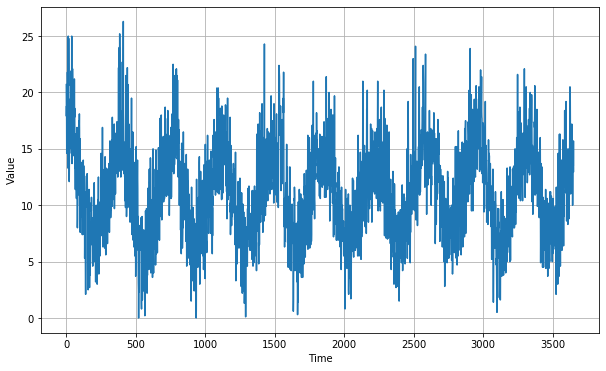

In [ ]:
import csv
time_step = []
temps = []
line=0
with open('/tmp/daily-min-temperatures.csv') as csvfile:
  csvreader=csv.reader(csvfile,delimiter=',')
  next(csvreader)
  for row in csvreader:
    line=line+1
    
    time_step.append(int(line))
    temps.append(float(row[1]))
   

# YOUR CODE HERE. READ TEMPERATURES INTO TEMPS
# HAVE TIME STEPS BE A SIMPLE ARRAY OF 1, 2, 3, 4 etc

series = np.array(temps)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [ ]:
split_time = 2500
time_train = time_step[:split_time]
x_train = series[:split_time]
time_valid = time_step[split_time:]
x_valid = series[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000



In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    # YOUR CODE HERE
    series=tf.expand_dims(series,-1)
    dataset=tf.data.Dataset.from_tensor_slices(series)
    dataset=dataset.window(size=window_size+1,shift=1,drop_remainder=True)
    dataset=dataset.flat_map(lambda window:window.batch(window_size+1))
    dataset=dataset.shuffle(shuffle_buffer_size).map(lambda window:(window[:-1],window[-1]))
    dataset=dataset.batch(batch_size).prefetch(1)
    return dataset

In [ ]:
def model_forecast(model, series, window_size):
    # YOUR CODE HERE
    dataset=tf.data.Dataset.from_tensor_slices(series)
    dataset=dataset.window(size=window_size,shift=1,drop_remainder=True)
    dataset=dataset.flat_map(lambda window:window.batch(window_size+1))
    dataset=dataset.batch(32).prefetch(1)
    forecast=model.predict(dataset)
    return forecast

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
# YOUR CODE HERE
tf.keras.layers.Conv1D(64,5,1,padding='valid',activation='relu',input_shape=[None,1]),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
tf.keras.layers.Dense(30,activation='relu'),
tf.keras.layers.Dense(1),
tf.keras.layers.Lambda(lambda x:x*200.0)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])




<PrefetchDataset shapes: ((None, None, 1), (None, 1)), types: (tf.float64, tf.float64)>
(3100,)
Epoch 1/100
12/12 [==============================] - 12s 984ms/step - loss: 15.3657 - mae: 15.8793
Epoch 2/100
12/12 [==============================] - 9s 737ms/step - loss: 15.2108 - mae: 15.7240
Epoch 3/100
12/12 [==============================] - 9s 723ms/step - loss: 15.0019 - mae: 15.5154
Epoch 4/100
12/12 [==============================] - 9s 716ms/step - loss: 14.7769 - mae: 15.2917
Epoch 5/100
12/12 [==============================] - 9s 717ms/step - loss: 14.5445 - mae: 15.0594
Epoch 6/100
12/12 [==============================] - 9s 728ms/step - loss: 14.3043 - mae: 14.8188
Epoch 7/100
12/12 [==============================] - 9s 713ms/step - loss: 14.0530 - mae: 14.5683
Epoch 8/100
12/12 [==============================] - 9s 709ms/step - loss: 13.7878 - mae: 14.3038
Epoch 9/100
12/12 [==============================] - 9s 745ms/step - loss: 13.5030 - mae: 14.0190
Epoch 10/100
12/12 [=

[1e-08, 0.0001, 0, 60]

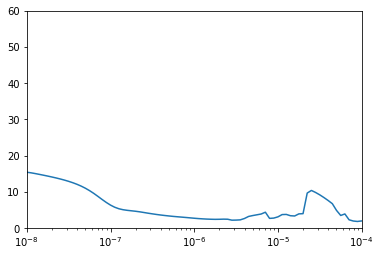

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
# YOUR CODE HERE
tf.keras.layers.Conv1D(64,5,1,padding='valid',activation='relu',input_shape=[None,1]),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
tf.keras.layers.Dense(30,activation='relu'),
tf.keras.layers.Dense(1),
tf.keras.layers.Lambda(lambda x:x*200.0)
])


optimizer = tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=300)
                                    
# EXPECTED OUTPUT SHOULD SEE AN MAE OF <2 WITHIN ABOUT 30 EPOCHS

Epoch 1/300
31/31 [==============================] - 14s 449ms/step - loss: 9.0492 - mae: 9.6124
Epoch 2/300
31/31 [==============================] - 11s 340ms/step - loss: 4.1178 - mae: 4.6080
Epoch 3/300
31/31 [==============================] - 10s 334ms/step - loss: 3.3823 - mae: 3.8643
Epoch 4/300
31/31 [==============================] - 10s 336ms/step - loss: 2.8549 - mae: 3.3304
Epoch 5/300
31/31 [==============================] - 10s 338ms/step - loss: 2.4782 - mae: 2.9464
Epoch 6/300
31/31 [==============================] - 10s 327ms/step - loss: 2.2388 - mae: 2.6997
Epoch 7/300
31/31 [==============================] - 10s 330ms/step - loss: 2.1314 - mae: 2.5927
Epoch 8/300
31/31 [==============================] - 11s 340ms/step - loss: 2.0646 - mae: 2.5242
Epoch 9/300
31/31 [==============================] - 10s 336ms/step - loss: 2.0277 - mae: 2.4866
Epoch 10/300
31/31 [==============================] - 10s 326ms/step - loss: 1.9972 - mae: 2.4553
Epoch 11/300
31/31 [=========

In [ ]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1]

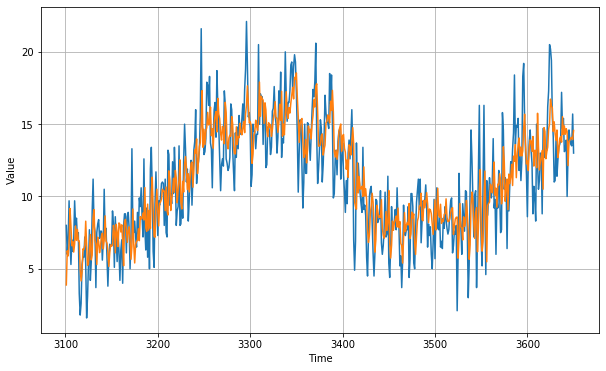

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

# EXPECTED OUTPUT. PLOT SHOULD SHOW PROJECTIONS FOLLOWING ORIGINAL DATA CLOSELY

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

# EXPECTED OUTPUT MAE < 2 -- I GOT 1.789626

1.77677

In [ ]:
print(rnn_forecast)
# EXPECTED OUTPUT -- ARRAY OF VALUES IN THE LOW TEENS

[ 3.8834016  6.2403283  5.8930135  6.728856   9.168415   7.9836154
  6.593104   6.890906   6.1553516  6.7140803  7.966039   6.9675803
  7.726244   6.92631    6.930112   4.980377   4.1597133  4.754717
  6.375549   6.31983    6.64074    8.291818   6.5885506  5.232844
  5.3477197  6.3481584  7.371477   5.614359   5.9542947  8.508731
  9.089413   6.9837203  6.6935616  5.2922144  7.1887226  6.8776717
  6.1168156  6.5413     7.279735   7.460924   6.3757524  6.98275
  8.658629   6.9091854  6.778028   6.1634703  5.1618466  6.0987763
  6.657908   6.564715   6.639579   8.002618   7.5751123  6.1033583
  8.076691   7.522527   6.5347276  8.172391   8.08209    7.5460277
  8.038563   6.8765564  5.204854   8.2026205  8.418285   7.7826104
  6.8280644  7.6145506  7.90072    7.014271   5.6602015  6.5506563
  9.132533   6.6629753  5.402974   6.673895   6.8947816  6.966958
  7.768394   6.9455824  8.607894   8.420323   8.498139   8.85396
  8.372083  10.615685   7.8283935  7.5859375  9.469772   7.6761417
  9